# Simple Linear Regression

In [1]:
import pandas as pd 
data = pd.read_csv('https://raw.githubusercontent.com/akjadon/Data/master/data/Boston1.csv')
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [2]:
data.shape

(506, 14)

In [3]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Let us take out the dependent and indpendent vaiables from the dataset

In [6]:
data_ = data.loc[:,['lstat','medv']]
data_.head(5)

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


# Visualizing variables

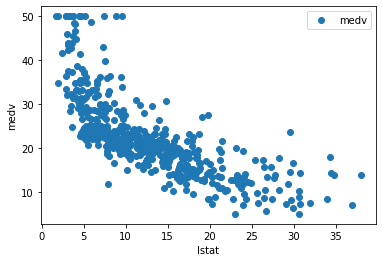

In [7]:
import matplotlib.pyplot as plt
data.plot(x='lstat',y='medv',style='o')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()

# Preparing data

In [8]:
X = pd.DataFrame(data['lstat'])
y = pd.DataFrame(data['medv'])

In [11]:
y.head(3)

,medv
0,24.0
1,21.6
2,34.7


In [12]:
X.size, y.size

(506, 506)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [15]:
from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()  
# regressor.fit(X_train, y_train)

In [16]:
regressor = LinearRegression() 

In [17]:
regressor.fit(X_train, y_train)

LinearRegression()

In [18]:
print(regressor.intercept_)

[34.33497839]


In [19]:
print(regressor.coef_)

[[-0.92441715]]


In [20]:
y_pred = regressor.predict(X_test)

In [22]:
X_test.head(3)

,lstat
307,7.53
343,7.18
47,18.80


In [25]:
# y_pred

In [26]:
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])

In [27]:
y_pred

,Predicted
0,27.374117
1,27.697663
2,16.955936
3,26.847199
4,24.915168
...,...
97,26.791734
98,30.507891
99,22.317555
100,19.830873


In [28]:
y_test

,medv
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8
...,...
92,22.9
224,44.8
110,21.7
426,10.2


In [29]:
from sklearn import metrics 
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.078127727696938
Mean Squared Error: 46.99482091954711
Root Mean Squared Error: 6.855276866731723


# Mulitple Linear Regression

In [31]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('https://raw.githubusercontent.com/akjadon/Data/master/data/Boston1.csv')
dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [32]:
X = pd.DataFrame(dataset.iloc[:,:-1])
y = pd.DataFrame(dataset.iloc[:,-1])

In [33]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [36]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [38]:
v = pd.DataFrame(regressor.coef_,index=['Co-efficient']).transpose()
w = pd.DataFrame(X.columns, columns=['Attribute'])

In [45]:
pd.DataFrame(regressor.coef_,index=['Co-efficient'])

,0,1,2,3,4,5,6,7,8,9,10,11,12
Co-efficient,-0.1308,0.049403,0.001095,2.705366,-15.95705,3.413973,0.001119,-1.493081,0.364422,-0.013172,-0.95237,0.011749,-0.594076


In [39]:
v

,Co-efficient
0,-0.130800
1,0.049403
2,0.001095
3,2.705366
4,-15.957050
5,3.413973
6,0.001119
7,-1.493081
8,0.364422
9,-0.013172


In [40]:
w

,Attribute
0,crim
1,zn
2,indus
3,chas
4,nox
5,rm
6,age
7,dis
8,rad
9,tax


In [41]:
coeff_df = pd.concat([w,v], axis=1, join='inner')
coeff_df

,Attribute,Co-efficient
0,crim,-0.130800
1,zn,0.049403
2,indus,0.001095
3,chas,2.705366
4,nox,-15.957050
5,rm,3.413973
6,age,0.001119
7,dis,-1.493081
8,rad,0.364422
9,tax,-0.013172


In [42]:
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred

,Predicted
0,37.563118
1,32.144451
2,27.065736
3,5.670806
4,35.099826
...,...
97,21.912956
98,22.394774
99,13.193354
100,23.969911


In [43]:
y_test

,medv
226,37.6
292,27.9
90,22.6
373,13.8
273,35.2
...,...
349,26.6
212,22.4
156,13.1
480,23.0


In [44]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.2132704958423632
Mean Squared Error: 20.869292183770522
Root Mean Squared Error: 4.568292042303176


In [46]:
import statsmodels.api as sm

In [47]:
model_sm = sm.OLS(y_train, X_train).fit()  -----------------------------  1
model_sm2 = sm.OLS(y_train, sm.add_constant(X_train)).fit()  ----------------------- 2

In [48]:
print(model_sm.summary())

                                 OLS Regression Results                                
Dep. Variable:                   medv   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              691.4
Date:                Sun, 08 Jan 2023   Prob (F-statistic):                   1.95e-260
Time:                        22:47:32   Log-Likelihood:                         -1223.1
No. Observations:                 404   AIC:                                      2472.
Df Residuals:                     391   BIC:                                      2524.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [49]:
model_sm2 = sm.OLS(y_train, sm.add_constant(X_train)).fit()

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [50]:
print(model_sm2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     84.65
Date:                Sun, 08 Jan 2023   Prob (F-statistic):          8.21e-105
Time:                        22:49:59   Log-Likelihood:                -1202.0
No. Observations:                 404   AIC:                             2432.
Df Residuals:                     390   BIC:                             2488.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.9125      5.775      6.565      0.0